In [34]:
import charts_function_list
import os

In [36]:
_,data,outputs = charts_function_list.folder_setup()
lego = os.path.join(data,'lego-database')
os.chdir(lego)

In [274]:
df_values = [x.split('.csv')[0] for x in os.listdir(lego)] 
df_values.remove('downloads_schema.png') #known non .csv

#set dictionary of all csvs
lego_d = {i:pd.read_csv(i+'.csv') for i in df_values}

In [ ]:
#function to convert hex to rgb
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

In [108]:
#begin with the colors
colors = lego_d["colors"]
colors = pd.concat([colors,pd.DataFrame(list(colors['rgb'].apply(hex_to_rgb).values),columns=['R','G','B'])],axis=1)

In [110]:
lego_d.keys()

dict_keys(['part_categories', 'inventories', 'parts', 'inventory_sets', 'inventory_parts', 'colors', 'sets', 'themes'])

In [275]:
color_dictionary ={k:v for k,v in zip(lego_d["colors"]['id'].values,lego_d["colors"]['rgb'].values)}
lego_d["inventory_parts"]['color_hex'] = lego_d["inventory_parts"]['color_id'].map(color_dictionary)

In [134]:
lego_d["inventory_parts"]['color_hex'] = lego_d["inventory_parts"]['color_id'].map(color_dictionary)

In [283]:
lego_d["inventory_parts"] = pd.concat([lego_d["inventory_parts"],pd.DataFrame(list(lego_d["inventory_parts"]['color_hex'].apply(hex_to_rgb).values),columns=['R','G','B'])],axis=1)
#lego_d["inventory_parts"] = lego_d["inventory_parts"].reset_index()
lego_part_color_index = lego_d["inventory_parts"].pivot_table('quantity',index='color_hex',aggfunc='sum')
rgb_values = pd.DataFrame(list(lego_part_color_index.reset_index()['color_hex'].apply(hex_to_rgb).values),columns=['R','G','B'])
part_count = pd.concat([lego_part_color_index.reset_index(),rgb_values],axis=1)
part_count['color_hex']= part_count['color_hex'].apply(lambda x: "#"+str(x))

In [284]:
part_count

,color_hex,quantity,R,G,B
0,#000000,199,0,0,0
1,#0020A0,7458,0,32,160
2,#0033B2,144,0,51,178
3,#0055BF,117430,0,85,191
4,#008F9B,1029,0,143,155
5,#05131D,398948,5,19,29
6,#078BC9,1456,7,139,201
7,#0A3463,12792,10,52,99
8,#184632,6812,24,70,50
9,#1B2A34,3,27,42,52


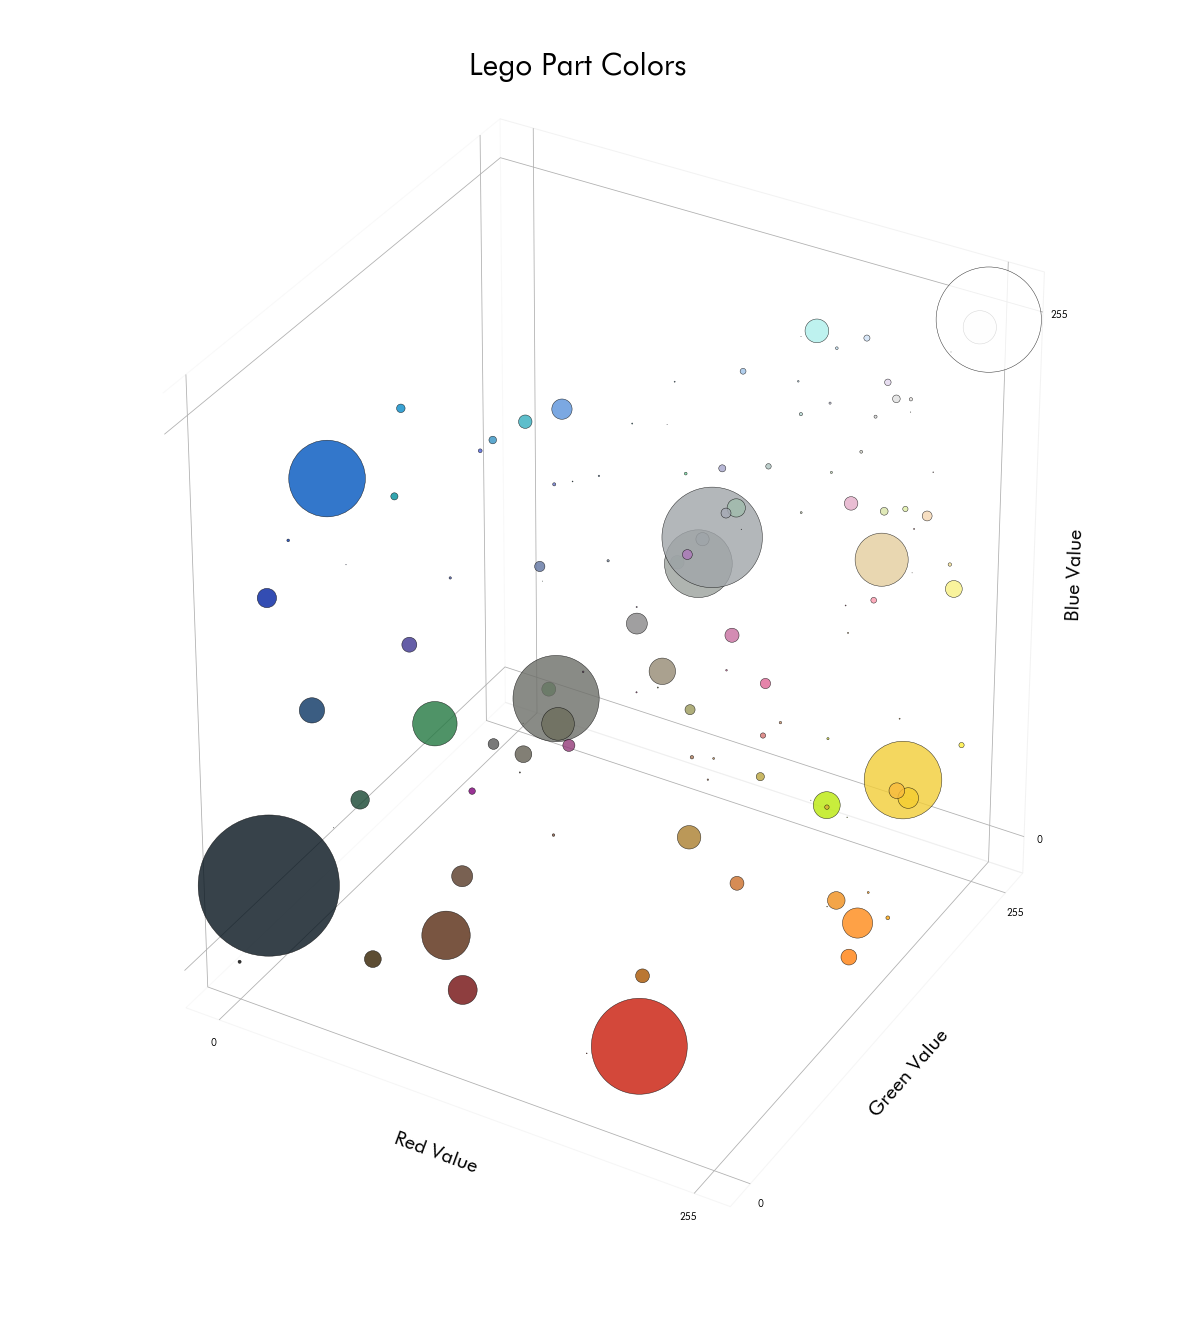

In [287]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
fig.suptitle('Lego Part Colors',size=30)
fig.subplots_adjust(top=.99)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(part_count['R'],part_count['G'],part_count['B'],s=part_count['quantity']/20,c=part_count['color_hex'],alpha=.8,
           edgecolor='black',linewidth=.5)

ax.set_xlabel('Red Value',fontsize=20)
ax.set_ylabel('Green Value',fontsize=20)
ax.set_zlabel('Blue Value',fontsize=20)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_xaxis.set_ticks([0,255])
ax.w_yaxis.set_ticks([0,255])
ax.w_zaxis.set_ticks([0,255])
ax.w_xaxis.set_ticks_position('none') 

for t1 in ax.xaxis.get_ticklines():
    t1.set_visible(False)
    
for t1 in ax.yaxis.get_ticklines():
    t1.set_visible(False)
    
for t1 in ax.zaxis.get_ticklines():
    t1.set_visible(False)
    